<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/Machine_Learning/blob/main/ML_Internal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#1. Write a program that demonstrates the advantage of ensemble learning compared to a single classifier. Apply a Decision Tree and
#a Random Forest (RF) classifier on a given dataset. Compare their performance using evaluation metrics such as accuracy, precision, recall, and
# F1-score. Explore the effect of changing the number of estimators (decision trees) in Random Forest.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Creating a simple synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    flip_y=0.1,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {acc_dt:.3f}, Precision: {prec_dt:.3f}, Recall: {rec_dt:.3f}, F1-Score: {f1_dt:.3f}")

print("\nRandom Forest Performance with different n_estimators:")

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)

    print(f"n_estimators = {n:3d} → Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-Score: {f1:.3f}")

Decision Tree Performance:
Accuracy: 0.773, Precision: 0.685, Recall: 0.926, F1-Score: 0.787

Random Forest Performance with different n_estimators:
n_estimators =  10 → Accuracy: 0.873, Precision: 0.845, Recall: 0.882, F1-Score: 0.863
n_estimators =  50 → Accuracy: 0.893, Precision: 0.825, Recall: 0.971, F1-Score: 0.892
n_estimators = 100 → Accuracy: 0.880, Precision: 0.812, Recall: 0.956, F1-Score: 0.878
n_estimators = 200 → Accuracy: 0.893, Precision: 0.833, Recall: 0.956, F1-Score: 0.890


In [6]:
# 2. Write a program that demonstrates the use of simple ensemble techniques: Max Voting,Average Voting, and
#Weighted Average Voting (assign weights based on each model’s performance).
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Max Voting (Majority Vote)
final_pred = []
for i in range(len(X_test)):
    votes = [pred1[i], pred2[i], pred3[i]]
    final_pred.append(max(set(votes), key=votes.count))

print("Max Voting Accuracy:", round(accuracy_score(y_test, final_pred), 3))

# Average Voting (based on probabilities)
prob1 = model1.predict_proba(X_test)
prob2 = model2.predict_proba(X_test)
prob3 = model3.predict_proba(X_test)

avg_prob = (prob1 + prob2 + prob3) / 3
avg_pred = np.argmax(avg_prob, axis=1)

print("Average Voting Accuracy:", round(accuracy_score(y_test, avg_pred), 3))

# Weighted Average Voting
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)

weights = np.array([acc1, acc2, acc3])
weights = weights / np.sum(weights)

weighted_prob = (weights[0]*prob1 + weights[1]*prob2 + weights[2]*prob3)
weighted_pred = np.argmax(weighted_prob, axis=1)

print("Weighted Average Voting Accuracy:", round(accuracy_score(y_test, weighted_pred), 3))

Max Voting Accuracy: 0.907
Average Voting Accuracy: 0.887
Weighted Average Voting Accuracy: 0.887


In [7]:
# 3.Write a program to show the difference between Hard Voting and Soft Voting classifiers inensemble learning using multiple base learners
# (e.g., Decision Tree, Logistic Regression, and KNN).
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

hard_voting = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='hard'
)

soft_voting = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='soft'
)

hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)

y_pred_hard = hard_voting.predict(X_test)
y_pred_soft = soft_voting.predict(X_test)

acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print("Hard Voting Accuracy :", round(acc_hard, 3))
print("Soft Voting Accuracy :", round(acc_soft, 3))


Hard Voting Accuracy : 0.88
Soft Voting Accuracy : 0.867


In [8]:
# 4. Write a program using the RandomForestRegressor model to make predictions on a suitable regression dataset.Enable and observe
# the oob_score (Out-of-Bag score) parameter. Interpret the results and explain its significance.
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X, y = make_regression(
    n_samples=500,
    n_features=8,
    noise=10,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

rf = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=1,
    bootstrap=True
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Test R² Score:", round(r2, 3))
print("Mean Squared Error:", round(mse, 3))
print("Out-of-Bag (OOB) Score:", round(rf.oob_score_, 3))

Test R² Score: 0.739
Mean Squared Error: 10024.021
Out-of-Bag (OOB) Score: 0.795


In [14]:
# 5. Write a program to explore different Boosting techniques using suitable datasets:Adaptive Boosting (AdaBoost) – binary classification.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

dt = DecisionTreeClassifier(max_depth=1, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=1
)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("Decision Tree (Weak Learner):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

print("AdaBoost Classifier:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

Decision Tree (Weak Learner):
Accuracy: 0.773

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        74
           1       0.79      0.75      0.77        76

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150

AdaBoost Classifier:
Accuracy: 0.827

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        74
           1       0.83      0.83      0.83        76

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



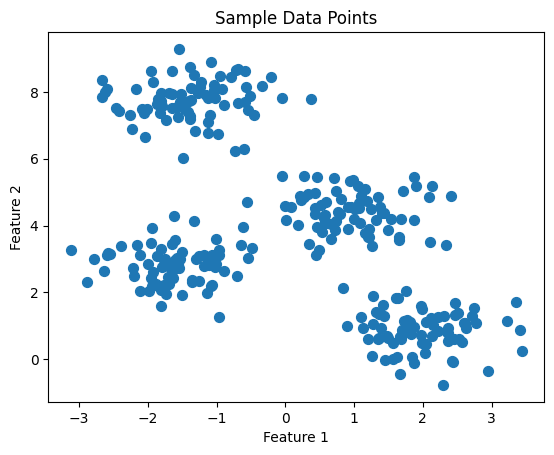

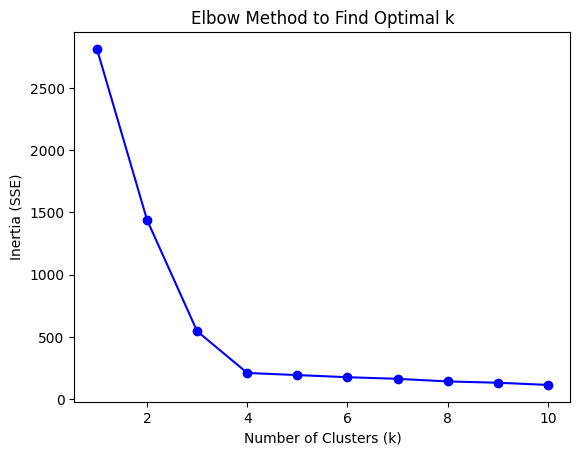

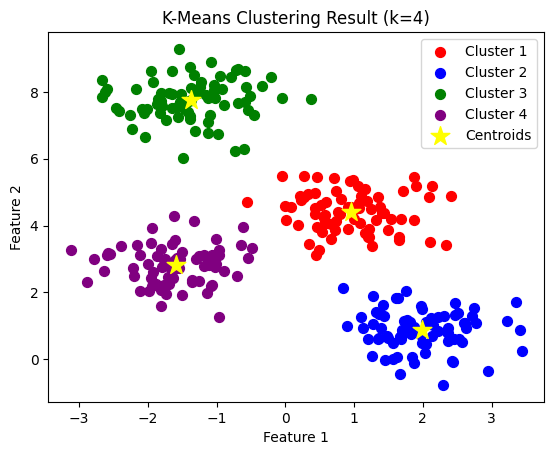

In [15]:
# 6. Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.6,
    random_state=0
)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Sample Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.title("Elbow Method to Find Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='purple', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', label='Centroids')

plt.title("K-Means Clustering Result (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()